In [21]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mpl_dates
import datetime

In [105]:
df = pd.read_csv('hastags.csv', engine='python')

In [106]:
df.head()

,tweet_id,created_at,tweets,likes,date,time,Hashtags,#snydercut,#zacksnydersjusticeleague,#borglife
0,1377795078538866692,2021-04-02 01:28:39,RT @ninaturner: Millions of Americans are stru...,0,2021-04-02,01:28:39,NaN,0,0,0
1,1376896607917051906,2021-03-30 13:58:27,RT @CoriBush: Theyâ€™re starting to count the ...,0,2021-03-30,13:58:27,NaN,0,0,0
2,1376583218674106371,2021-03-29 17:13:09,"Toby Emmerich, Geoff Johns, and Jon Bergâ€™s r...",10699,2021-03-29,17:13:09,NaN,0,0,0
3,1376569420877815815,2021-03-29 16:18:20,RT @CoriBush: Derek Chauvin is on trial.\nAmer...,0,2021-03-29,16:18:20,NaN,0,0,0
4,1375943286846787585,2021-03-27 22:50:18,RT @BernieSanders: What Amazon workers in Alab...,0,2021-03-27,22:50:18,NaN,0,0,0


In [107]:
df_dates = df[['date', '#snydercut', '#zacksnydersjusticeleague', '#borglife']]

In [108]:
df_dates

,date,#snydercut,#zacksnydersjusticeleague,#borglife
0,2021-04-02,0,0,0
1,2021-03-30,0,0,0
2,2021-03-29,0,0,0
3,2021-03-29,0,0,0
4,2021-03-27,0,0,0
...,...,...,...,...
495,2020-09-30,0,0,0
496,2020-09-30,0,0,0
497,2020-09-30,0,0,0
498,2020-09-30,0,0,0


In [112]:
#changing the data and time format
df_dates['date'] = pd.to_datetime(df_dates['date'])

<ipython-input-112-510910141018>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates['date'] = pd.to_datetime(df_dates['date'])


In [115]:
#giving the date a frequency of 5 days
new_df = df_dates.groupby(pd.Grouper(key='date',freq='5D')).sum().reset_index()

In [116]:
new_df

,date,#snydercut,#zacksnydersjusticeleague,#borglife
0,2020-09-30,0,0,1
1,2020-10-05,0,0,1
2,2020-10-10,0,0,0
3,2020-10-15,0,0,0
4,2020-10-20,0,0,1
5,2020-10-25,0,0,0
6,2020-10-30,0,0,2
7,2020-11-04,0,0,0
8,2020-11-09,0,0,0
9,2020-11-14,0,0,0


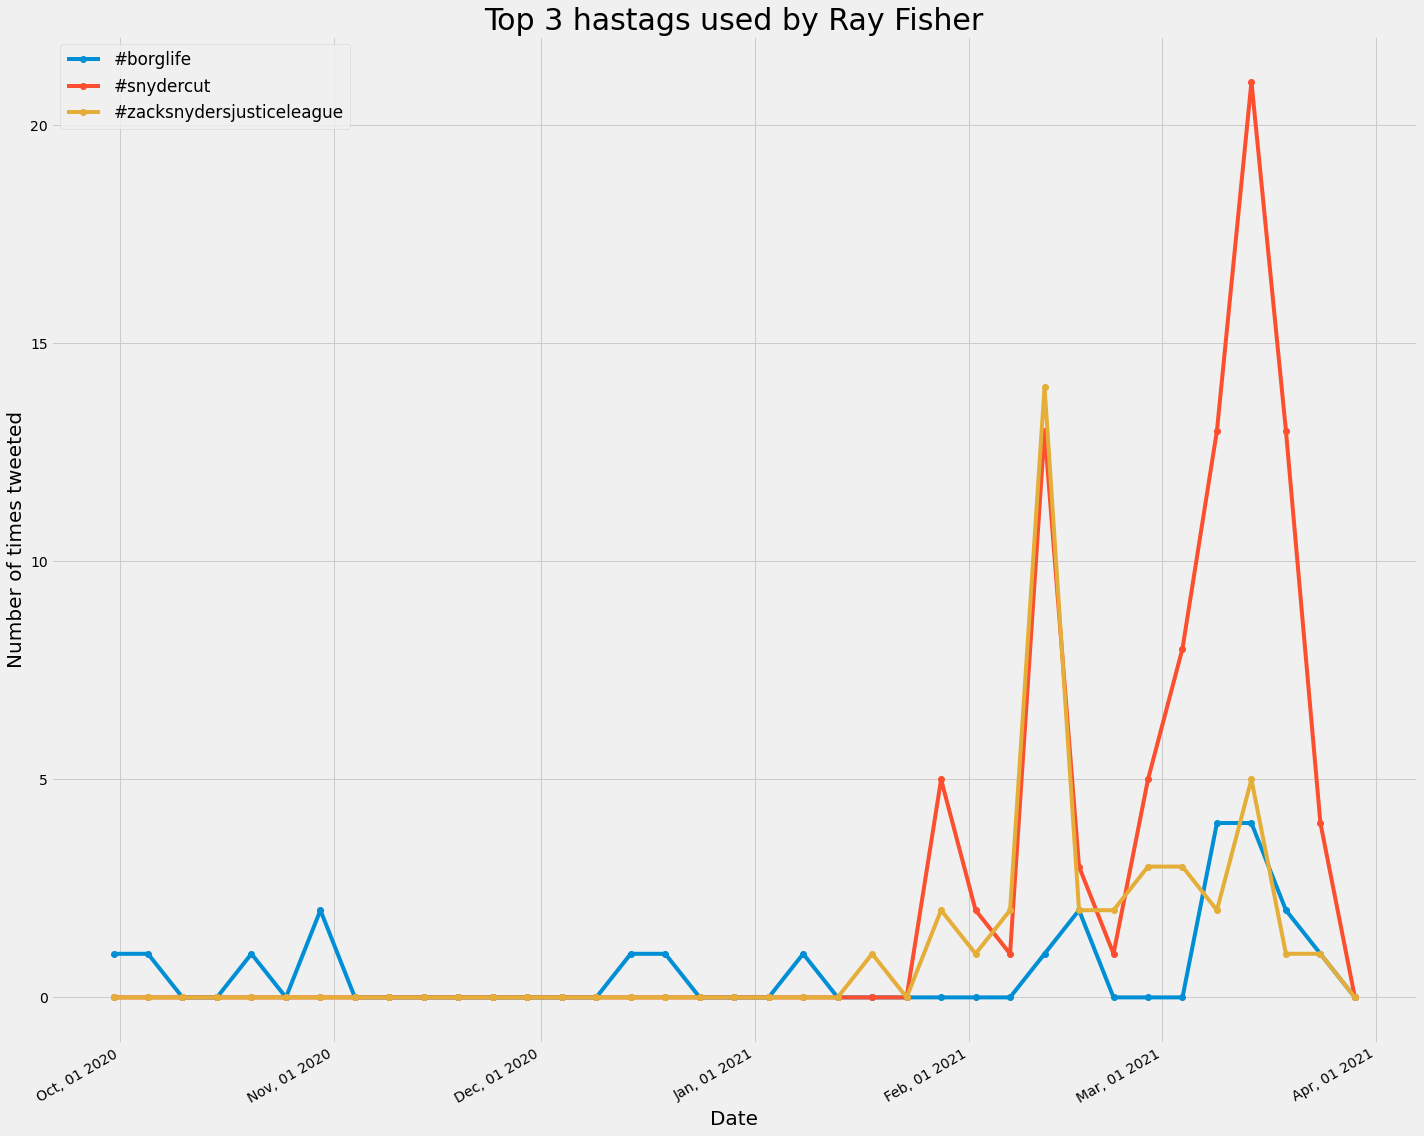

In [151]:
plt.plot_date(new_df['date'], new_df['#borglife'], linestyle = 'solid', label = '#borglife')
plt.plot_date(new_df['date'], new_df['#snydercut'], linestyle = 'solid', label = '#snydercut')
plt.plot_date(new_df['date'], new_df['#zacksnydersjusticeleague'], linestyle = 'solid', label = '#zacksnydersjusticeleague')
plt.legend(loc = 'best', fontsize = 'large')
plt.style.use('fivethirtyeight')
plt.title('Top 3 hastags used by Ray Fisher', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of times tweeted',  fontsize=20)
plt.rcParams['figure.figsize'] = (20,16)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b, %d %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
#plt.savefig('RayFisher.png', bbox_inches = "tight")
plt.show()